# **이직예측**
---

> **프로젝트명**

```
▶ 이직예측
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 인사이트 도출
```

---
> **문제정의**

```
▶ 이직 직원수 증가, 핵심인재 유출, 업무 로드 증가
```  

> **기대효과**

```
▶ 이직 직원수 감소, 핵심인재 방어, 업무 로드 평준화
```

> **해결방안**

```
▶ 이직 가능성이 높은 직원 예측 및 관리 프로그램 운영
```

> **성과측정**  

```
▶ 관리프로그램 운영 후 이직률 모니터링
```

> **운영**  

```
▶ 매 월 Model에 Input하기 위한 Data mart 생성
▶ 매 월 이직 가망 가능성 타겟 고객군 추출 및 관리프로그램 운영
```

In [1]:
import os
os.chdir('C:/Users/user/Desktop/석한/DATA')
os.getcwd()

'C:\\Users\\user\\Desktop\\석한\\DATA'

In [7]:
# ▶ Data read
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.read_csv('HR_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### **Data 정보 탐색**``

In [8]:
# Data shape 확인
df.shape

(1470, 35)

In [9]:
# Data columns & type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# Null 값 확인
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# Outlier 확인
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# 이직현황 확인
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [14]:
# 이직률
237 / (237+1233) * 100

16.122448979591837

In [15]:
# yes, no -> 1, 0 변환
df['Attrition'] = np.where(df['Attrition']== 'Yes', 1, 0)
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [17]:
# 고객 프로필(성별 / 연령대 분석)
# 구간화
df['Age_group'] = np.where (df['Age'] <= 30, '30 이하',
                           np.where(df['Age'] <= 40, '30-40대', '40대 이상'))
df[['Age','Age_group']]

,Age,Age_group
0,41,40대 이상
1,49,40대 이상
2,37,30-40대
3,33,30-40대
4,27,30 이하
...,...,...
1465,36,30-40대
1466,39,30-40대
1467,27,30 이하
1468,49,40대 이상


In [22]:
# 연령별 이직률 현황
df_group = df.groupby('Age_group')['Attrition'].agg(['count','sum'])
df_group['ratio'] = round((df_group['sum'] / df_group['count']) * 100, 1)
df_group

,count,sum,ratio
Age_group,,,
30 이하,386,100,25.9
30-40대,619,85,13.7
40대 이상,465,52,11.2


In [24]:
# 성별 이직률 현황
df_age = df.groupby('Gender')['Attrition'].agg(['count','sum'])
df_age['ratio'] = round((df_age['sum'] / df_age['count']) * 100, 1)
df_age

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [25]:
# 부서별 이직률 현황
df_dep = df.groupby('Department')['Attrition'].agg(['count','sum'])
df_dep['ratio'] = round((df_dep['sum'] / df_dep['count']) * 100, 1)
df_dep

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


### **EDA**
---
> 이직에 영향을 주는 요소 탐방

In [26]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_group
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,40대 이상
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,40대 이상
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,30-40대
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,30-40대
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,30 이하


##### 업무만족도와 인간관계

In [27]:
df[['JobSatisfaction', 'RelationshipSatisfaction', 'Attrition']].head(5)

,JobSatisfaction,RelationshipSatisfaction,Attrition
0,4,1,1
1,2,4,0
2,3,2,1
3,3,3,0
4,2,4,0


In [29]:
# 업무 만족도별 이직률 현황, 업무만족도가 낮을 수록 이직률이 높음
df_JS = df.groupby(['JobSatisfaction'])['Attrition'].agg(['count','sum'])
df_JS['ratio'] = round((df_JS['sum'] / df_JS['count']) * 100, 1)
df_JS

,count,sum,ratio
JobSatisfaction,,,
1,289,66,22.8
2,280,46,16.4
3,442,73,16.5
4,459,52,11.3


In [30]:
# 업무만족도가 높은 직원은 인관관계에 따라 이직률에 영향을 덜 받는것으로 보이고,
# 업무만족도가 낮은 직원은 인관관계가 나쁠수록 이직률이 증가하는 경향이 보임
df_J_R = df.groupby(['JobSatisfaction', 'RelationshipSatisfaction'])['Attrition'].agg(['count','sum'])
df_J_R['ratio'] = round((df_J_R['sum'] / df_J_R['count']) * 100, 1)
df_J_R

count  sum  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

##### 근속년수와 직무

In [31]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_group
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,40대 이상
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,40대 이상
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,30-40대
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,30-40대
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,30 이하


In [35]:
# 근속년수 대비 한가지 직무 비중
df['Role_Company'] = df['YearsInCurrentRole']	/ df['YearsAtCompany'] * 100
df['Role_Company'].fillna(0, inplace =True) 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_group,Role_Company
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,40대 이상,66.666667
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,40대 이상,70.000000
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,30-40대,0.000000
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,30-40대,87.500000
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,30 이하,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,30-40대,40.000000
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,30-40대,100.000000
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,30 이하,33.333333
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,40대 이상,66.666667


C:\Users\user\AppData\Local\Temp\ipykernel_141360\1639925108.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Role_Company']);


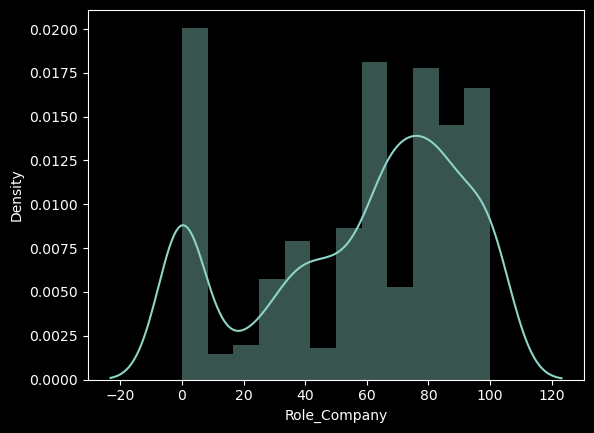

In [36]:
# 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Role_Company']);

In [43]:
# 구간화
import numpy as np
df['Role_Company_group'] = np.where (df['Role_Company'] <= 40, '40% 이하',
                           np.where(df['Role_Company'] <= 80, '40 - 80 %', '80% 초과'))

df[['Role_Company','Role_Company_group']]

,Role_Company,Role_Company_group
0,66.666667,40 - 80 %
1,70.000000,40 - 80 %
2,0.000000,40% 이하
3,87.500000,80% 초과
4,100.000000,80% 초과
...,...,...
1465,40.000000,40% 이하
1466,100.000000,80% 초과
1467,33.333333,40% 이하
1468,66.666667,40 - 80 %


In [45]:
# 근속년수 대비 같은일은 오래한 경우 이직률이 낮음
df_RG = df.groupby('Role_Company_group')['Attrition'].agg(['count', 'sum'])
df_RG['ratio'] = round((df_RG['sum'] / df_RG['count']) * 100, 1)
df_RG

,count,sum,ratio
Role_Company_group,,,
40 - 80 %,621,81,13.0
40% 이하,454,103,22.7
80% 초과,395,53,13.4


##### 야근과 급여인상률

In [46]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_group,Role_Company,Role_Company_group
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,40대 이상,66.666667,40 - 80 %
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,40대 이상,70.000000,40 - 80 %
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,30-40대,0.000000,40% 이하
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,30-40대,87.500000,80% 초과
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,30 이하,100.000000,80% 초과


In [47]:
# 야근 여부에 따른 이직률 현황
df_ot = df.groupby('OverTime')['Attrition'].agg(['count', 'sum'])
df_ot['ratio'] = round((df_ot['sum'] / df_ot['count']) * 100, 1)
df_ot

,count,sum,ratio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [48]:
# 야근, 연봉상승률과 이직
df_os = df.groupby(['OverTime', 'PercentSalaryHike'])['Attrition'].agg(['count', 'sum'])
df_os['ratio'] = round((df_os['sum'] / df_os['count']) * 100, 1)
df_os

# 야근 No 직원은, 연봉상승률이 높더라도 이직을 않하는 경향을 찾아보기는 힘듬

count  sum  ratio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [50]:
# 야근 Yes 직원 Data 분석
df_gp_plot = df_os.reset_index()
df_gp_plot = df_gp_plot[df_gp_plot['OverTime']=='Yes']
df_gp_plot

,OverTime,PercentSalaryHike,count,sum,ratio
15,Yes,11,61,22,36.1
16,Yes,12,59,15,25.4
17,Yes,13,65,20,30.8
18,Yes,14,56,16,28.6
19,Yes,15,21,6,28.6
20,Yes,16,23,6,26.1
21,Yes,17,16,5,31.2
22,Yes,18,29,8,27.6
23,Yes,19,21,6,28.6
24,Yes,20,15,3,20.0


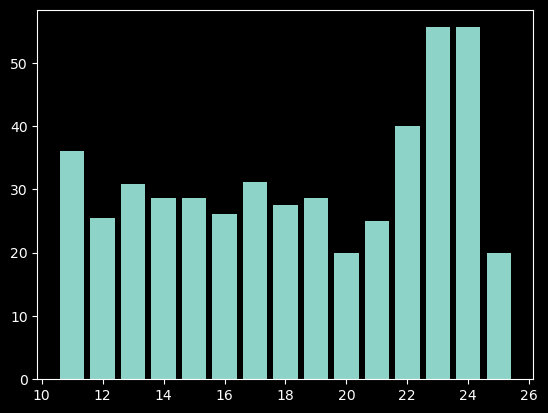

In [51]:
# 야근 Yes 직원 Data 분석, 20%상승률 까지는 감소하는 듯하나 22%이상 상승하는 경우 바로 이직 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

plt.bar(df_gp_plot['PercentSalaryHike'], df_gp_plot['ratio']);

### 예측분석

In [52]:
# numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Age_group', 'Role_Company_group']
numeric_list : ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Role_Company']


In [55]:
# 모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['Attrition', 'Age_group', 'Role_Company_group', 'Role_Company'], axis=1)
Y=df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1029, 34)
(1029,)
(441, 34)
(441,)


In [56]:
# ▶ EDA 과정에서 생성한 변수들은 제거
categoical_list.remove('Age_group')
categoical_list.remove('Role_Company_group')

ValueError: list.remove(x): x not in list

In [57]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [58]:
x_test[categoical_list].head(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
188,1,1,1,1,4,1,0,0
314,2,1,3,1,3,1,0,1
367,2,1,5,1,0,2,0,0
1147,2,1,1,0,2,1,0,0
201,0,1,1,1,4,0,0,1


##### 모델 학습 및 평가

In [59]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 123456, max_depth=3, n_estimators=125)
rfc.fit(x_train, y_train)

# 예측

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       863
           1       1.00      0.05      0.10       166

    accuracy                           0.85      1029
   macro avg       0.92      0.53      0.51      1029
weighted avg       0.87      0.85      0.79      1029

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [60]:
pd.Series(y_pred_test).value_counts()

0    440
1      1
Name: count, dtype: int64

In [61]:
y_pred_train = rfc.predict_proba(x_train)[:, 1]
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.3:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = rfc.predict_proba(x_test)[:, 1]
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.3:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       863
           1       0.70      0.32      0.44       166

    accuracy                           0.87      1029
   macro avg       0.79      0.65      0.68      1029
weighted avg       0.85      0.87      0.85      1029

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.60      0.30      0.40        71

    accuracy                           0.85       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.83      0.85      0.83       441



In [62]:
pd.Series(y_pred_test).value_counts()

0.0    406
1.0     35
Name: count, dtype: int64

In [63]:
# 이직 관리프로그램 운영 모수
37/441

0.08390022675736962

In [64]:
# 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.854451409345377
roc_score_test : 0.8199086410354016


In [65]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_141360\978437699.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


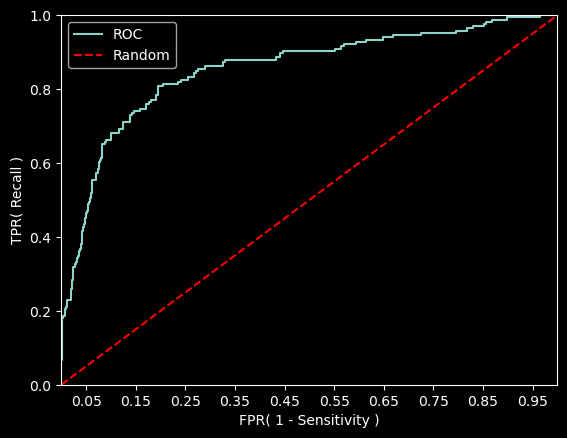

In [66]:
roc_curve_plot(y_train, y_pred_train_proba)

C:\Users\user\AppData\Local\Temp\ipykernel_141360\978437699.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


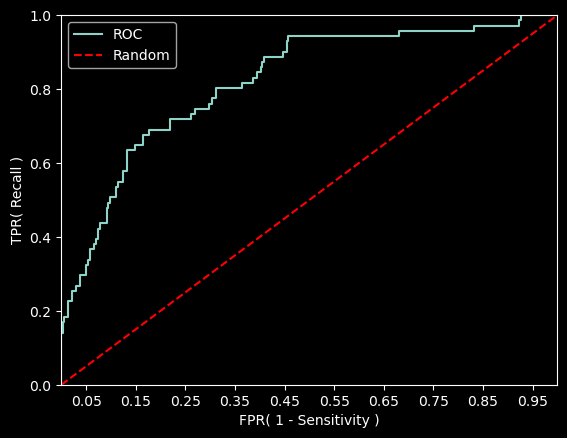

In [67]:
roc_curve_plot(y_test, y_pred_test_proba)

##### 중요 변수 파악

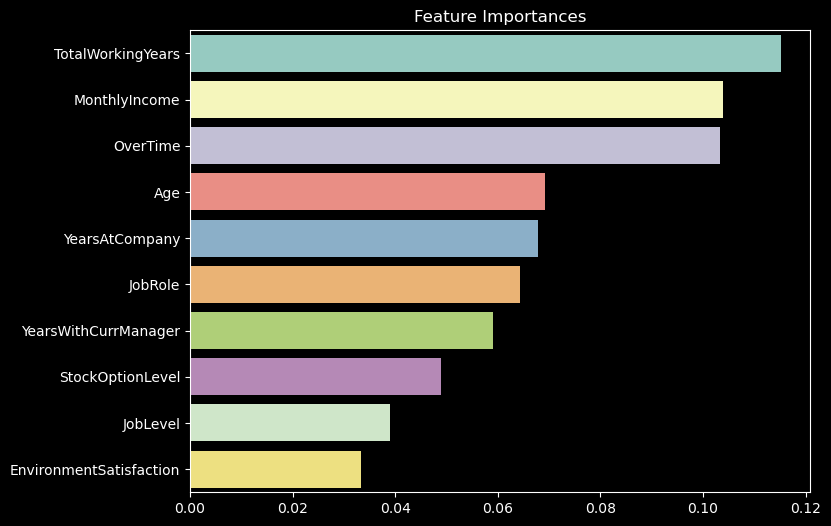

In [68]:
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=10)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_141360\4215174865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalWorkingYears']);


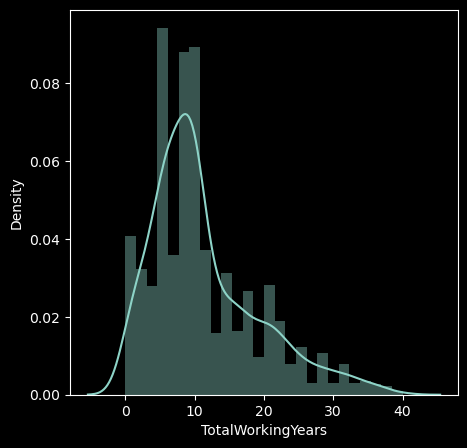

In [69]:
# 1위 변수 탐색
sns.distplot(df['TotalWorkingYears']);
plt.gcf().set_size_inches(5 ,5)

In [70]:
# 구간화
df['TotalWorkingYears_gp'] = np.where (df['TotalWorkingYears'] <= 10, '10 이하',
                           np.where(df['TotalWorkingYears'] <= 20, '10-20', '20 초과'))

df[['TotalWorkingYears','TotalWorkingYears_gp']]

,TotalWorkingYears,TotalWorkingYears_gp
0,8,10 이하
1,10,10 이하
2,7,10 이하
3,8,10 이하
4,6,10 이하
...,...,...
1465,17,10-20
1466,9,10 이하
1467,6,10 이하
1468,17,10-20


In [71]:
# 월급이 낮을 수록 이직률이 높다.
df_gp = df.groupby('TotalWorkingYears_gp')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
TotalWorkingYears_gp,,,
10 이하,923,182,19.7
10-20,340,39,11.5
20 초과,207,16,7.7


In [72]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)